In [1]:
import os 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize': (8,6)})
%matplotlib inline

#datetime lib:
from pandas import to_datetime
import itertools 
import warnings 
import datetime 
warnings.filterwarnings('ignore')

#SKlearn lib:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor #ok


In [2]:
main = 'C:\\Users\\joaopaulo\\Desktop\\Gla_data\\PP EPC FULL'
gla_file = os.path.join(main, 'final_merge4.csv')
gla_data = pd.read_csv(gla_file)

print(gla_data.shape) #(331654, 29)
gla_data.head()

(871020, 37)


index          county              district       oa11     lsoa11  \
0  1787073  GREATER LONDON              LEWISHAM  E00016638  E01003296   
1  1811124  GREATER LONDON              LEWISHAM  E00016638  E01003296   
2  1870838  GREATER LONDON                MERTON  E00017413  E01003447   
3   359864  GREATER LONDON               BROMLEY  E00003311  E01000683   
4  1630531  GREATER LONDON  KINGSTON UPON THAMES  E00014905  E01002961   

      msoa11  postcode                           ADDRESS        lat      long  \
0  E02000664  SE13 5FP  014 Brick Kiln One, Station Road  51.465100 -0.012095   
1  E02000664  SE13 5FL  036 River Mill One, Station Road  51.465120 -0.012728   
2  E02000704  SW20 0AN                   1, Aboyne Drive  51.408534 -0.243936   
3  E02000161   BR6 9UD                  1, Ambrose Close  51.367211  0.089848   
4  E02000605   KT3 3UY                   1, Bakewell Way  51.410950 -0.260673   

   ...  Fare_Zone  Deprivation_Index  driving_distance_miles  Median(£)-2011  \
0  ...        3.0           5.850052                    5.81        190000.0   
1  ...        3.0           5.850052                    5.81        190000.0   
2  ...        4.0           3.240188                   13.92        210000.0   
3  ...        6.0          -2.300779                   17.67        230000.0   
4  ...        4.0          -2.684785                   14.03        460000.0   

   connec_air_public  connec_air_car  connec_road_car  \
0           0.438756        0.253657         0.434362   
1           0.438756        0.253657         0.434362   
2           0.360948        0.284701         0.447893   
3           0.266449        0.254481         0.464440   
4           0.341132        0.289282         0.447246   

   Gross Domestic Product: Quarter on Quarter growth: CVM SA %  \
0                                                0.3             
1                                                0.7             
2                                                0.5             
3                                                0.6             
4                                                0.7             

   Construction, cont Q on Q yr ago  \
0                             -0.13   
1                             -0.07   
2                              0.16   
3                              0.23   
4                              0.67   

   Real Estate Activities (period on period growth) %:CVM  
0                                                0.5       
1                                               -0.4       
2                                                1.5       
3                                                0.3       
4                                                1.5       

[5 rows x 37 columns]

In [3]:
gla_data.columns

Index(['index', 'county', 'district', 'oa11', 'lsoa11', 'msoa11', 'postcode',
       'ADDRESS', 'lat', 'long', 'property_type', 'new_build', 'duration',
       'category', 'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA',
       'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION', 'PROPERTY_TYPE',
       'BUILT_FORM', 'LODGEMENT_DATE', 'deed_date', 'year', 'quarter',
       'price_paid', 'Fare_Zone', 'Deprivation_Index',
       'driving_distance_miles', 'Median(£)-2011', 'connec_air_public',
       'connec_air_car', 'connec_road_car',
       'Gross Domestic Product: Quarter on Quarter growth: CVM SA %',
       'Construction, cont Q on Q yr ago',
       'Real Estate Activities (period on period growth) %:CVM'],
      dtype='object')

In [4]:
gla_data.isnull().sum()

index                                                               0
county                                                              0
district                                                            0
oa11                                                               24
lsoa11                                                             24
msoa11                                                             24
postcode                                                            0
ADDRESS                                                             0
lat                                                                24
long                                                               24
property_type                                                       0
new_build                                                           0
duration                                                            0
category                                                            0
CURRENT_ENERGY_RATIN

In [5]:
gla_data.dropna(subset=['Fare_Zone', 'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011', 'NUMBER_HABITABLE_ROOMS', 
                       'NUMBER_HEATED_ROOMS'], inplace=True)
print(gla_data.shape)
##(331654, 29) -> 331643, 29)

(746174, 37)


In [6]:
gla_data.isnull().sum()

index                                                              0
county                                                             0
district                                                           0
oa11                                                               0
lsoa11                                                             0
msoa11                                                             0
postcode                                                           0
ADDRESS                                                            0
lat                                                                0
long                                                               0
property_type                                                      0
new_build                                                          0
duration                                                           0
category                                                           0
CURRENT_ENERGY_RATING             

In [7]:
#Limiting the data:

gla_data2 = gla_data[['property_type', 'new_build', 'duration', 'category',     
       'CURRENT_ENERGY_RATING', 'TOTAL_FLOOR_AREA', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'MULTI_GLAZE_PROPORTION', 'WINDOWS_DESCRIPTION',
       'PROPERTY_TYPE', 'BUILT_FORM', 'price_paid', 'Fare_Zone',
       'Deprivation_Index', 'driving_distance_miles', 'Median(£)-2011']]

In [25]:
#Visualise data using seaborn - Step 1:

#Clip outliers out:
gla_plot = gla_data2

cols_clip = ['TOTAL_FLOOR_AREA', 'NUMBER_HEATED_ROOMS', 'price_paid']

for i in cols_clip:
    lower = gla_plot[i].quantile(0.3)
    upper = gla_plot[i].quantile(0.97)
    gla_plot[i] = gla_plot[i].clip(lower, upper)

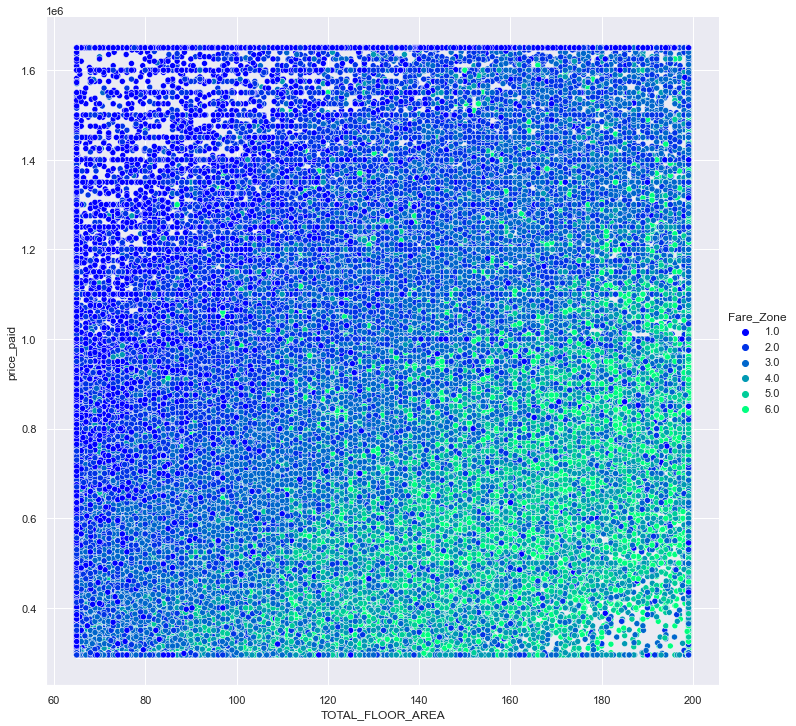

In [29]:
#Visualise data using seaborn - Step 2:

sns.relplot(data=gla_plot, x='TOTAL_FLOOR_AREA', y='price_paid', hue='Fare_Zone', palette='winter', height = 10)

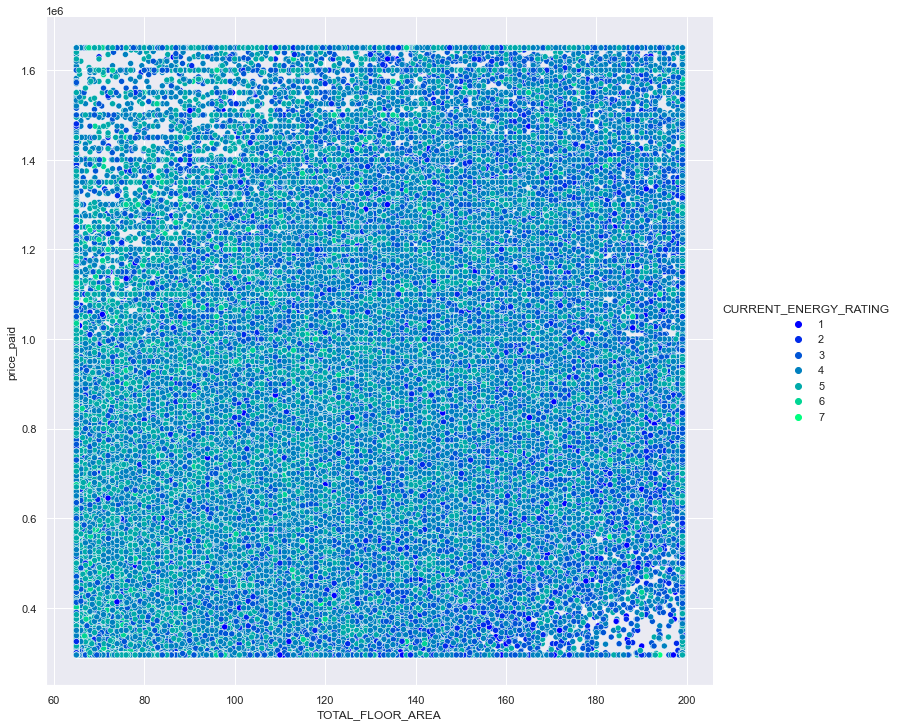

In [28]:
sns.relplot(data=gla_plot, x='TOTAL_FLOOR_AREA', y='price_paid', hue='CURRENT_ENERGY_RATING', palette='winter', height = 10)

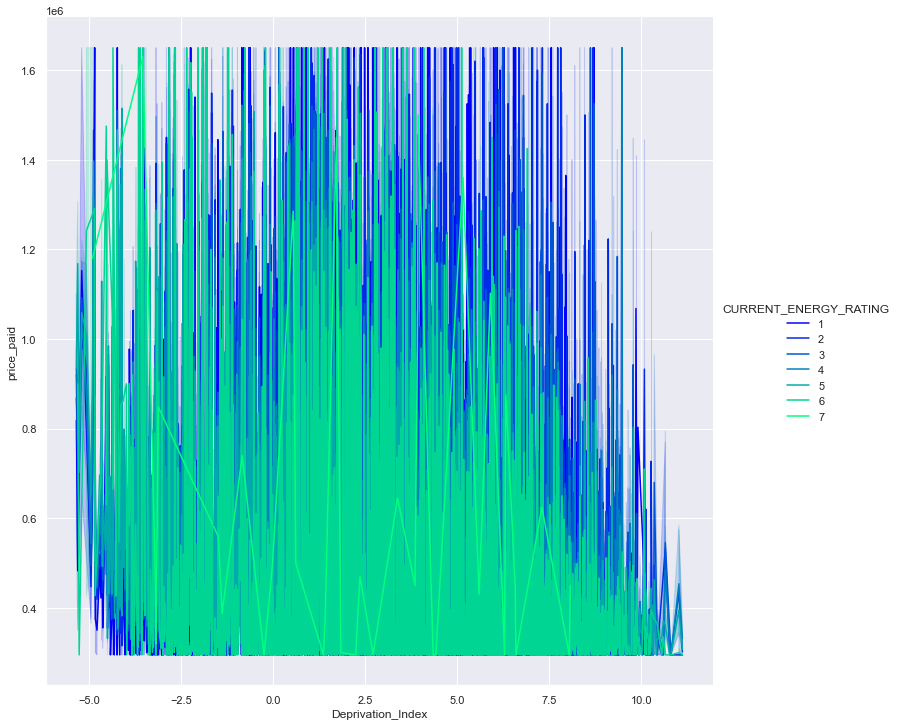

In [30]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='price_paid', hue='CURRENT_ENERGY_RATING', kind="line", palette='winter', height = 10)

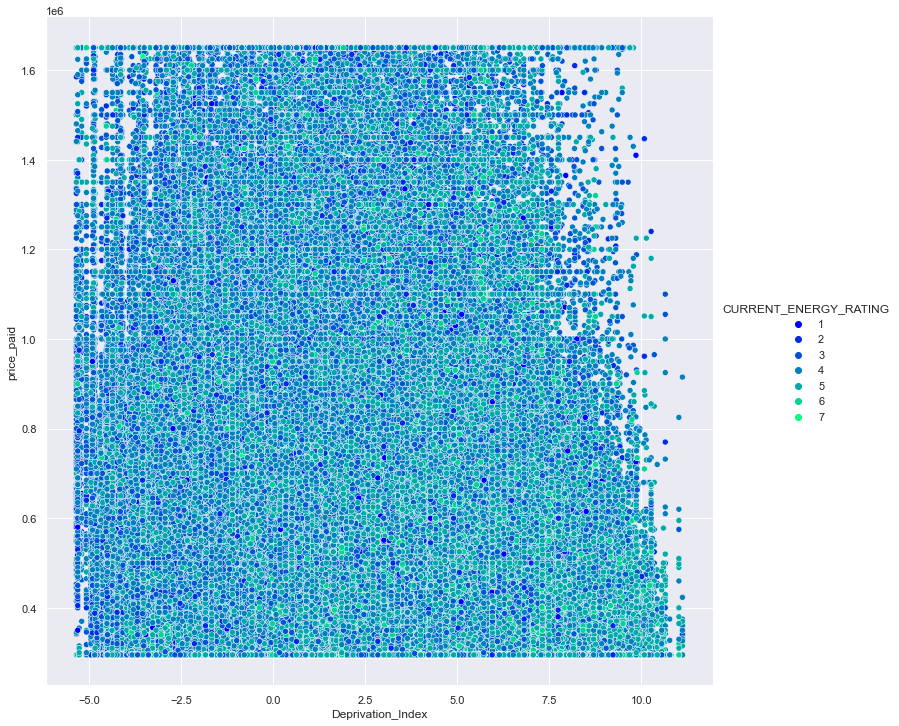

In [32]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='price_paid', hue='CURRENT_ENERGY_RATING', palette='winter', height = 10)

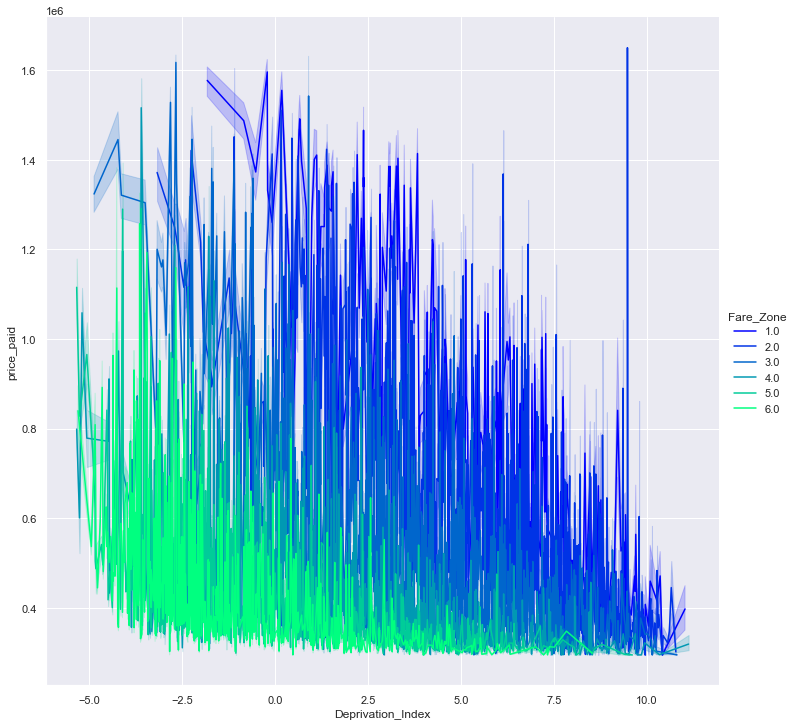

In [34]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='price_paid', hue='Fare_Zone', kind="line", palette='winter', height = 10)

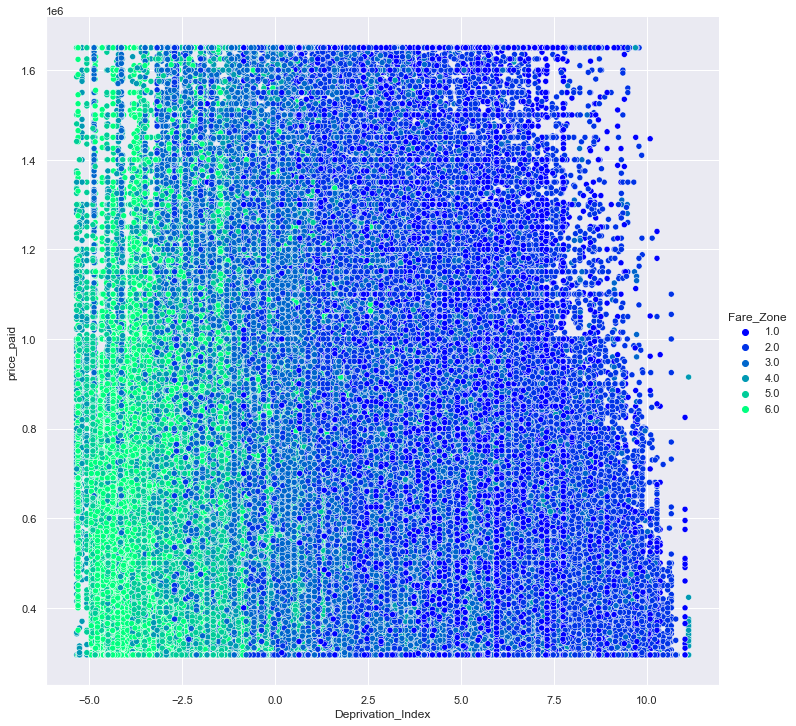

In [33]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='price_paid', hue='Fare_Zone', palette='winter', height = 10)

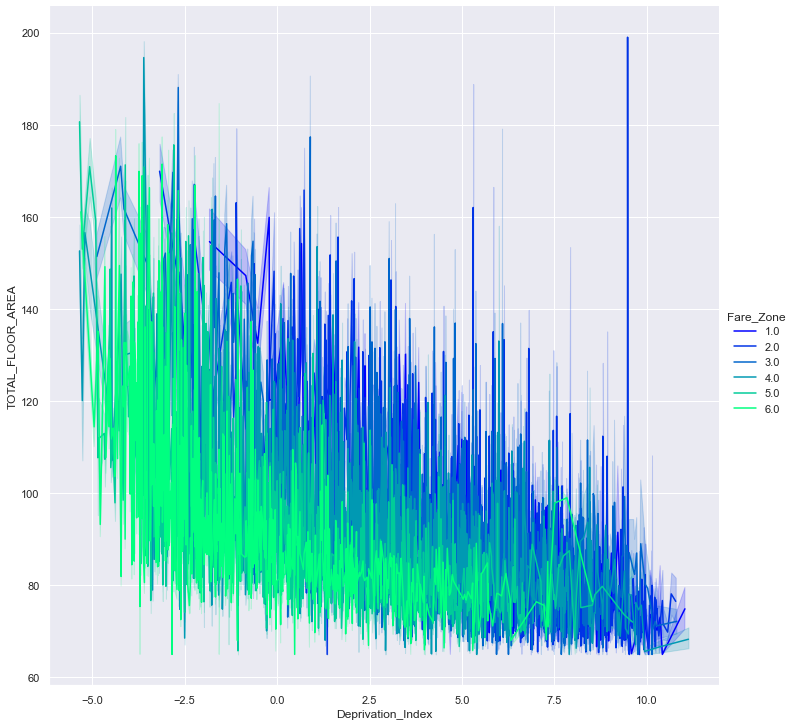

In [35]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='TOTAL_FLOOR_AREA', hue='Fare_Zone', kind='line', palette='winter', height = 10)

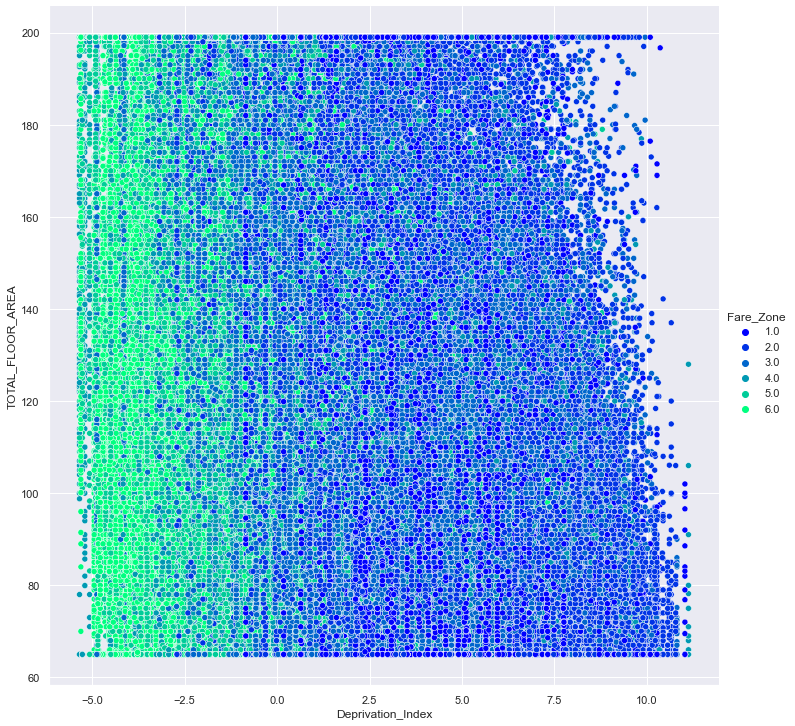

In [36]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='TOTAL_FLOOR_AREA', hue='Fare_Zone', palette='winter', height = 10)

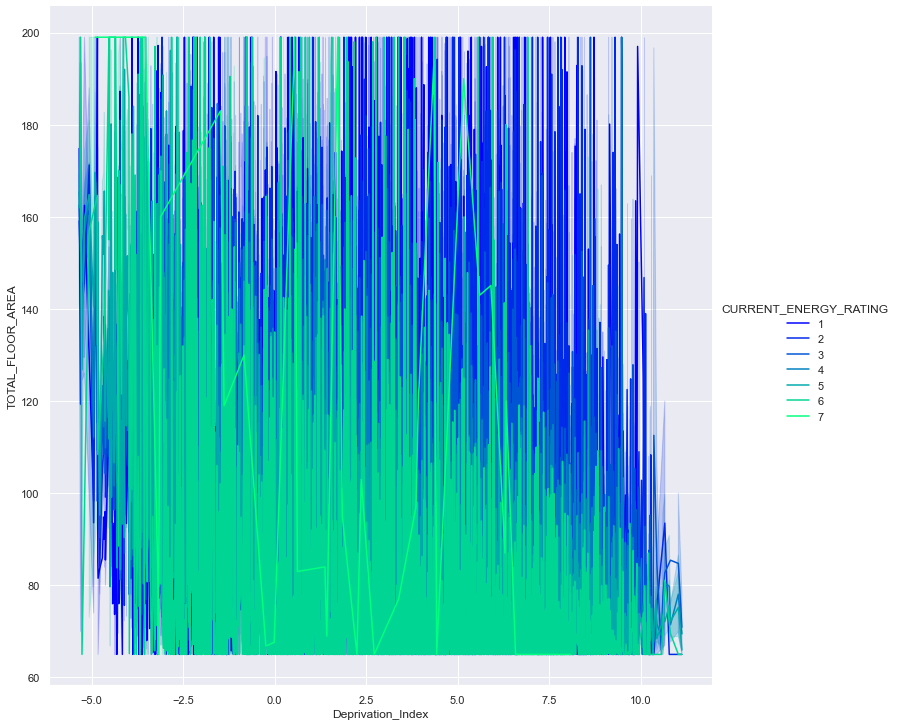

In [37]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='TOTAL_FLOOR_AREA', hue='CURRENT_ENERGY_RATING', kind='line', palette='winter', height = 10)

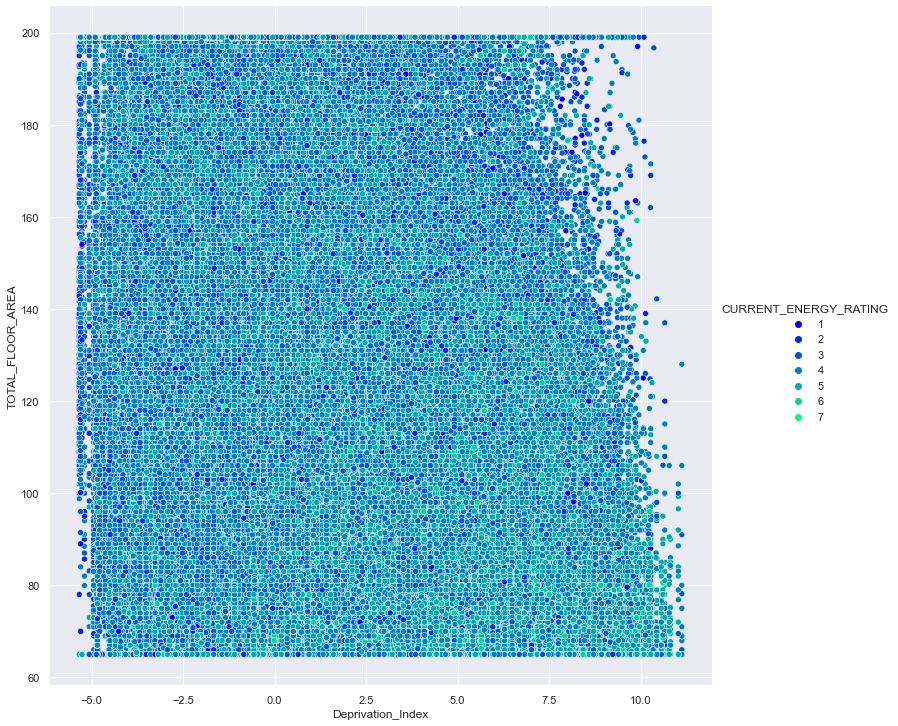

In [38]:
sns.relplot(data=gla_plot, x='Deprivation_Index', y='TOTAL_FLOOR_AREA', hue='CURRENT_ENERGY_RATING', palette='winter', height = 10)

In [22]:
#Investigate elements within each feature:

for column in gla_data2:
    unique_vals = np.unique(gla_data2[column])
    nr_vals = len(unique_vals)
    if nr_vals <60:
        print('The number of unique values for feature {}: {} - {}'.format(column, nr_vals, unique_vals))
    else:
        print('The number of unique values for feature {}: {}'.format(column, nr_vals))

The number of unique values for feature property_type: 4 - [1. 3. 4. 5.]
The number of unique values for feature new_build: 2 - [0. 1.]
The number of unique values for feature duration: 2 - [0. 1.]
The number of unique values for feature category: 1 - [1.]
The number of unique values for feature CURRENT_ENERGY_RATING: 7 - [1. 2. 3. 4. 5. 6. 7.]
The number of unique values for feature TOTAL_FLOOR_AREA: 26657
The number of unique values for feature NUMBER_HABITABLE_ROOMS: 48 - [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 25. 30. 31. 33. 34. 36. 40. 44. 50. 51. 54. 55.
 57. 58. 60. 67. 69. 72. 80. 83. 85. 87. 97. 99.]
The number of unique values for feature NUMBER_HEATED_ROOMS: 34 - [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 25. 30. 31. 36. 44. 57. 67. 72. 80. 83.]
The number of unique values for feature MULTI_GLAZE_PROPORTION: 101
The number of unique values for feature WINDOWS_DES